<a href="https://colab.research.google.com/github/vidomirana/Analise-Basis-Algodao/blob/main/Vitor_Miranda_Sousa_projeto_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Projeto Final da Disciplina de Tópicos Especiais em Pesquisa Operacional**

# Título: Análise do Basis do Algodão na cidade de Barreiras-BA para definição de estratégias de comercialização

Alunos: Sabrina Vieira e Vitor Miranda

# Introdução

Basis é um indicador importante para comercialização de commodities agrícolas. Este indicador auxilia o produtor a tomar decisões de comercialização, de modo a  determinar se é mais vantajoso vender o grão no mercado local ou utilizar contratos futuros para aproveitar oportunidades em mercados mais amplos, sendo ainda possível através da análise do basis identificar oportunidades de arbitragem e gerenciamento de riscos de preços, como também, esta análise fornece insights sobre as condições de oferta e demanda da commodities, e quais os fatores que influenciam os diferentes mercados em que a commodities é negociado.
Neste trabalho iremos analisar o comportamento do basis da cultura do algodão e sua relação com contratos futuros, assim como, analisar estratégias de negociação envolvendo o estudo do comportamento histórico do basis.
O basis pode ser por um influenciado por uma série de fatores, incluindo oferta e demanda local, logística de transporte, custos de armazenamento, qualidade do grão, condições climáticas, políticas governamentais e outros elementos específicos da região ou mercado em questão. No âmbito da comercialização de grãos, o basis refere-se à diferença de preço entre o valor de um determinado grão em uma localidade específica (como uma região produtora) e o preço de referência desse grão em um mercado mais amplo, como uma bolsa de commodities.

Para aproveitar as oportunidades em mercados mais amplos é necessario utilizar-se de contrato futuro, sendo este um segmento do mercado financeiro onde são negociados contratos de compra e venda de ativos financeiros e commodities para entrega futura. Esses contratos são padronizados, especificando as características dos ativos, como quantidade, data de vencimento e preço. No Brasil, os estudos sobre o mercado futuro do algodão são realizados por diversos órgãos e instituições ligados ao setor agropecuário e ao mercado financeiro, como por exemplo, a Companhia Nacional de Abastecimento (Conab), vinculada ao Ministério da Agricultura, Pecuária e Abastecimento. A Conab produz relatórios periódicos que abordam a oferta e demanda do algodão, previsões de safra, estoques, exportações, importações e preços, incluindo projeções para o mercado futuro.

Além disso, há também instituições privadas e associações de produtores que se dedicam a estudar o mercado futuro do algodão. Esses estudos têm como objetivo analisar as tendências e perspectivas do mercado futuro do algodão, fornecendo informações valiosas para produtores, traders, investidores e demais agentes envolvidos na cadeia produtiva.

# Objetivos

O objetivo do trabalho é explorar o conceito e aplicação do Basis e sua relação com o mercado futuro da cultura do algodão, e assim, verificar a influência da taxa de câmbio e oferta-demanda local analisando a curva de preço. Os efeitos de oferta e demanda estão relacionados ao ciclo de produção do grão, como também ao comércio local e internacional. Logo, é possível analisar estratégias de negociação envolvendo o estudo do comportamento histórico do basis, e calcular média histórica e a volatilidade por ano do basis, que será demonstrado o comportamento em seguida a partir de gráficos e discussão sobre a influência da curva de preço de contratos futuros obtidos no basis e em estratégias de negociação.

# Análise de dados e discussão de resultados

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
fisico = pd.read_csv('/content/drive/MyDrive/Projeto Final - Tópicos P.O/local_tratado (1).csv')
fisico

,DATA,UNIDADE,PRECO
0,2017-01-18,arroba,107.0
1,2017-01-19,arroba,107.0
2,2017-01-20,arroba,107.0
3,2017-01-23,arroba,107.0
4,2017-01-24,arroba,107.0
...,...,...,...
1554,2023-05-25,arroba,157.5
1555,2023-05-26,arroba,157.5
1556,2023-05-29,arroba,157.5
1557,2023-05-30,arroba,157.5


In [ ]:
fisico['DATA'] = pd.to_datetime(fisico.DATA)   #.dt.strftime('%Y-%m-%d')
fisico.set_index('DATA', inplace=True)
fisico.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1559 entries, 2017-01-18 to 2023-05-31
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   UNIDADE  1559 non-null   object 
 1   PRECO    1559 non-null   float64
dtypes: float64(1), object(1)
memory usage: 36.5+ KB


In [ ]:
fisico = fisico.rename_axis('date')
fisico

,UNIDADE,PRECO
date,,
2017-01-18,arroba,107.0
2017-01-19,arroba,107.0
2017-01-20,arroba,107.0
2017-01-23,arroba,107.0
2017-01-24,arroba,107.0
...,...,...
2023-05-25,arroba,157.5
2023-05-26,arroba,157.5
2023-05-29,arroba,157.5


In [ ]:
futuro = pd.read_csv('/content/drive/MyDrive/Projeto Final - Tópicos P.O/historicoalgodao.csv')
futuro

,date,value
0,1972-08-22,0.2673
1,1972-08-23,0.2703
2,1972-08-24,0.2706
3,1972-08-25,0.2722
4,1972-08-28,0.2704
...,...,...
12776,2023-06-09,0.8400
12777,2023-06-12,0.8300
12778,2023-06-13,0.8300
12779,2023-06-14,0.8200


In [ ]:
futuro['date'] = pd.to_datetime(futuro.date)   #.dt.strftime('%Y-%m-%d')
futuro.set_index('date', inplace=True)
futuro.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12781 entries, 1972-08-22 to 2023-06-15
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0    value  12781 non-null  float64
dtypes: float64(1)
memory usage: 199.7 KB


In [ ]:
futuro

,value
date,
1972-08-22,0.2673
1972-08-23,0.2703
1972-08-24,0.2706
1972-08-25,0.2722
1972-08-28,0.2704
...,...
2023-06-09,0.8400
2023-06-12,0.8300
2023-06-13,0.8300


In [ ]:
dolar = pd.read_csv('/content/drive/MyDrive/Projeto Final - Tópicos P.O/cotacao.csv')
dolar

,cotacaoCompra,cotacaoVenda,dataHoraCotacao
0,"1,8003","1,8011",2000-01-03 19:43:00.0
1,"1,8329","1,8337",2000-01-04 19:13:00.0
2,"1,8536","1,8544",2000-01-05 19:11:00.0
3,"1,8453","1,8461",2000-01-06 19:16:00.0
4,"1,8273","1,8281",2000-01-07 19:23:00.0
...,...,...,...
5887,"4,8916","4,8922",2023-06-09 13:10:17.92
5888,"4,8826","4,8832",2023-06-12 13:03:35.049
5889,"4,8527","4,8533",2023-06-13 13:09:17.108
5890,"4,8456","4,8462",2023-06-14 13:06:22.3


In [ ]:
dolar = dolar[['dataHoraCotacao','cotacaoCompra']].rename(columns={'cotacaoCompra':'Dolar_PTAX', 'dataHoraCotacao':'date'}).copy()
dolar

,date,Dolar_PTAX
0,2000-01-03 19:43:00.0,"1,8003"
1,2000-01-04 19:13:00.0,"1,8329"
2,2000-01-05 19:11:00.0,"1,8536"
3,2000-01-06 19:16:00.0,"1,8453"
4,2000-01-07 19:23:00.0,"1,8273"
...,...,...
5887,2023-06-09 13:10:17.92,"4,8916"
5888,2023-06-12 13:03:35.049,"4,8826"
5889,2023-06-13 13:09:17.108,"4,8527"
5890,2023-06-14 13:06:22.3,"4,8456"


In [ ]:
dolar['date'] = pd.to_datetime(dolar['date']).dt.strftime('%Y-%m-%d')
dolar['date'] = pd.to_datetime(dolar['date'])
dolar.set_index('date', inplace=True)


In [ ]:
dolar = dolar.replace(',', '.', regex=True)
dolar = dolar.astype(float)
dolar.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5892 entries, 2000-01-03 to 2023-06-15
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Dolar_PTAX  5892 non-null   float64
dtypes: float64(1)
memory usage: 92.1 KB


In [ ]:
dolar

,Dolar_PTAX
date,
2000-01-03,1.8003
2000-01-04,1.8329
2000-01-05,1.8536
2000-01-06,1.8453
2000-01-07,1.8273
...,...
2023-06-09,4.8916
2023-06-12,4.8826
2023-06-13,4.8527


In [ ]:
fisico.index.dtype

dtype('<M8[ns]')

In [ ]:
futuro.index.dtype

dtype('<M8[ns]')

In [ ]:
dolar.index.dtype

dtype('<M8[ns]')

In [ ]:
teste = pd.merge(fisico[['PRECO']], dolar, how='left', on='date')
teste

,PRECO,Dolar_PTAX
date,,
2017-01-18,107.0,3.2205
2017-01-19,107.0,3.2107
2017-01-20,107.0,3.1912
2017-01-23,107.0,3.1603
2017-01-24,107.0,3.1643
...,...,...
2023-05-25,157.5,4.9984
2023-05-26,157.5,5.0108
2023-05-29,157.5,4.9948


In [ ]:
result = pd.merge(teste[['PRECO', 'Dolar_PTAX']], futuro, how='left', on='date')
result

,PRECO,Dolar_PTAX,value
date,,,
2017-01-18,107.0,3.2205,0.7226
2017-01-19,107.0,3.2107,0.7269
2017-01-20,107.0,3.1912,0.7304
2017-01-23,107.0,3.1603,0.7463
2017-01-24,107.0,3.1643,0.7357
...,...,...,...
2023-05-25,157.5,4.9984,0.8000
2023-05-26,157.5,5.0108,0.8400
2023-05-29,157.5,4.9948,0.8400


In [ ]:
result = result.rename(columns={'PRECO': 'PRECOFIS', ' value': 'PRECOFUT'})
result

,PRECOFIS,Dolar_PTAX,PRECOFUT
date,,,
2017-01-18,107.0,3.2205,0.7226
2017-01-19,107.0,3.2107,0.7269
2017-01-20,107.0,3.1912,0.7304
2017-01-23,107.0,3.1603,0.7463
2017-01-24,107.0,3.1643,0.7357
...,...,...,...
2023-05-25,157.5,4.9984,0.8000
2023-05-26,157.5,5.0108,0.8400
2023-05-29,157.5,4.9948,0.8400


In [ ]:
quant_nulo = result.PRECOFUT.isna().sum()
print(quant_nulo)

15


In [ ]:
result[result.PRECOFUT.isna()==True].index

DatetimeIndex(['2017-02-20', '2017-05-29', '2017-07-04', '2017-11-23',
               '2018-01-15', '2018-02-19', '2018-05-28', '2018-07-04',
               '2018-09-03', '2018-11-22', '2019-01-21', '2019-02-18',
               '2020-07-03', '2021-11-20', '2022-12-03'],
              dtype='datetime64[ns]', name='date', freq=None)

In [ ]:
def preenche_anterior(df, coluna):
    import pandas as pd
    for nan in range(0, df[coluna].isna().sum()):
        nulo = df[df[coluna].isna()==True].index[0]
        anterior = df[coluna].loc[:nulo].dropna().index[-1]
        anterior = anterior.to_pydatetime()  #converte o objeto Timestamp em um Datetime
        anterior = anterior.strftime('%Y-%m-%d')
        nulo = nulo.to_pydatetime()
        nulo = nulo.strftime('%Y-%m-%d')
        df[coluna].loc[nulo] = df[coluna].loc[anterior]
    return df

result = preenche_anterior(result, 'PRECOFUT')
result.loc[:'2017-02-25']

,PRECOFIS,Dolar_PTAX,PRECOFUT
date,,,
2017-01-18,107.00,3.2205,0.7226
2017-01-19,107.00,3.2107,0.7269
2017-01-20,107.00,3.1912,0.7304
2017-01-23,107.00,3.1603,0.7463
2017-01-24,107.00,3.1643,0.7357
2017-01-25,107.00,3.1679,0.7388
2017-01-26,107.00,3.1798,0.7419
2017-01-27,107.00,3.1590,0.7485
2017-01-30,107.00,3.1310,0.7414


In [ ]:
result[result.Dolar_PTAX.isna()==True].index

DatetimeIndex(['2021-02-16', '2021-11-20', '2022-02-28', '2022-03-01',
               '2022-12-03'],
              dtype='datetime64[ns]', name='date', freq=None)

In [ ]:
result = preenche_anterior(result, 'Dolar_PTAX')
result.loc['2021-02-10':'2021-02-20']

,PRECOFIS,Dolar_PTAX,PRECOFUT
date,,,
2021-02-10,155.67,5.4018,0.8467
2021-02-11,155.67,5.3620,0.8641
2021-02-16,155.67,5.3620,0.8812
2021-02-17,155.67,5.4132,0.8836
2021-02-18,164.85,5.4232,0.8873
2021-02-19,164.85,5.3918,0.8895


In [ ]:
result[result.Dolar_PTAX.isna()==True].index

DatetimeIndex([], dtype='datetime64[ns]', name='date', freq=None)

In [ ]:
result = preenche_anterior(result, 'Dolar_PTAX')
result.loc[:'2017-02-25']

,PRECOFIS,Dolar_PTAX,PRECOFUT
date,,,
2017-01-18,107.00,3.2205,0.7226
2017-01-19,107.00,3.2107,0.7269
2017-01-20,107.00,3.1912,0.7304
2017-01-23,107.00,3.1603,0.7463
2017-01-24,107.00,3.1643,0.7357
2017-01-25,107.00,3.1679,0.7388
2017-01-26,107.00,3.1798,0.7419
2017-01-27,107.00,3.1590,0.7485
2017-01-30,107.00,3.1310,0.7414


In [ ]:
if result['PRECOFUT'].isnull().any():
    print("A coluna contém valores nulos.")
else:
    print("A coluna não contém valores nulos.")

A coluna não contém valores nulos.


## Conversão de unidades

In [ ]:
def convertelibra_arroba(valor):
    arroba_kg = 15   #arroba para quilograma
    kg_lb = 2.204623    #quilograma para libra
    v = (valor / kg_lb) / arroba_kg
    return v


In [ ]:
convertelibra_arroba(1)

0.03023948614645981

In [ ]:
result

,PRECOFIS,Dolar_PTAX,PRECOFUT
date,,,
2017-01-18,107.0,3.2205,0.7226
2017-01-19,107.0,3.2107,0.7269
2017-01-20,107.0,3.1912,0.7304
2017-01-23,107.0,3.1603,0.7463
2017-01-24,107.0,3.1643,0.7357
...,...,...,...
2023-05-25,157.5,4.9984,0.8000
2023-05-26,157.5,5.0108,0.8400
2023-05-29,157.5,4.9948,0.8400


In [ ]:
result.PRECOFUT = result.PRECOFUT * result.Dolar_PTAX
result

,PRECOFIS,Dolar_PTAX,PRECOFUT
date,,,
2017-01-18,107.0,3.2205,2.327133
2017-01-19,107.0,3.2107,2.333858
2017-01-20,107.0,3.1912,2.330852
2017-01-23,107.0,3.1603,2.358532
2017-01-24,107.0,3.1643,2.327976
...,...,...,...
2023-05-25,157.5,4.9984,3.998720
2023-05-26,157.5,5.0108,4.209072
2023-05-29,157.5,4.9948,4.195632


In [ ]:
result.PRECOFUT = result.PRECOFUT / convertelibra_arroba(1)
result

,PRECOFIS,Dolar_PTAX,PRECOFUT
date,,,
2017-01-18,107.0,3.2205,76.956774
2017-01-19,107.0,3.2107,77.179150
2017-01-20,107.0,3.1912,77.079765
2017-01-23,107.0,3.1603,77.995105
2017-01-24,107.0,3.1643,76.984625
...,...,...,...
2023-05-25,157.5,4.9984,132.235051
2023-05-26,157.5,5.0108,139.191254
2023-05-29,157.5,4.9948,138.746802


In [ ]:
result.loc['2021-02-10':'2021-02-20']

,PRECOFIS,Dolar_PTAX,PRECOFUT
date,,,
2021-02-10,155.67,5.4018,151.249397
2021-02-11,155.67,5.3620,153.220335
2021-02-16,155.67,5.3620,156.252470
2021-02-17,155.67,5.4132,158.174100
2021-02-18,164.85,5.4232,159.129865
2021-02-19,164.85,5.3918,158.600780


<Axes: xlabel='date'>

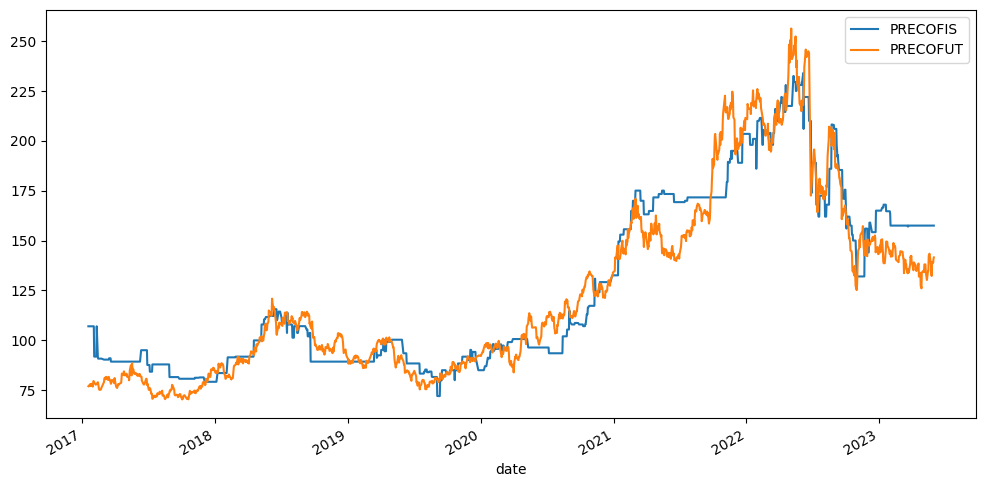

In [ ]:
result[['PRECOFIS', 'PRECOFUT']].plot(figsize=(12,6))

In [ ]:
result['BASIS'] = result.PRECOFIS - result.PRECOFUT
result

,PRECOFIS,Dolar_PTAX,PRECOFUT,BASIS
date,,,,
2017-01-18,107.0,3.2205,76.956774,30.043226
2017-01-19,107.0,3.2107,77.179150,29.820850
2017-01-20,107.0,3.1912,77.079765,29.920235
2017-01-23,107.0,3.1603,77.995105,29.004895
2017-01-24,107.0,3.1643,76.984625,30.015375
...,...,...,...,...
2023-05-25,157.5,4.9984,132.235051,25.264949
2023-05-26,157.5,5.0108,139.191254,18.308746
2023-05-29,157.5,4.9948,138.746802,18.753198


<Axes: xlabel='date'>

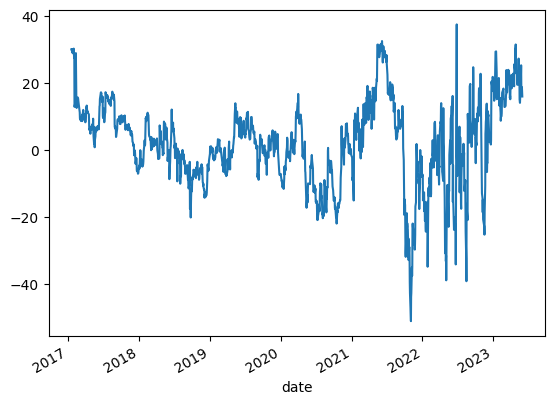

In [ ]:
result.BASIS.plot()

#Análise do Basis Histórico

In [ ]:
dados2023 = result.loc['2023']
dados2023

,PRECOFIS,Dolar_PTAX,PRECOFUT,BASIS
date,,,,
2023-01-02,165.0,5.3430,146.652294,18.347706
2023-01-03,165.0,5.3753,147.538850,17.461150
2023-01-04,165.0,5.4453,144.058003,20.941997
2023-01-05,165.0,5.4020,148.271699,16.728301
2023-01-06,165.0,5.2849,150.300636,14.699364
...,...,...,...,...
2023-05-25,157.5,4.9984,132.235051,25.264949
2023-05-26,157.5,5.0108,139.191254,18.308746
2023-05-29,157.5,4.9948,138.746802,18.753198


In [ ]:
dados2023['mes'] = dados2023.index.month
dados2023

,PRECOFIS,Dolar_PTAX,PRECOFUT,BASIS,mes
date,,,,,
2023-01-02,165.0,5.3430,146.652294,18.347706,1
2023-01-03,165.0,5.3753,147.538850,17.461150,1
2023-01-04,165.0,5.4453,144.058003,20.941997,1
2023-01-05,165.0,5.4020,148.271699,16.728301,1
2023-01-06,165.0,5.2849,150.300636,14.699364,1
...,...,...,...,...,...
2023-05-25,157.5,4.9984,132.235051,25.264949,5
2023-05-26,157.5,5.0108,139.191254,18.308746,5
2023-05-29,157.5,4.9948,138.746802,18.753198,5


In [ ]:
dados_atuais = pd.DataFrame({'mes': dados2023['mes'].unique()})
dados_atuais.set_index('mes', inplace=True)
dados_atuais

""
mes
1
2
3
4
5


In [ ]:
dados_atuais['media'] = dados2023.dropna().groupby('mes')['BASIS'].mean()
dados_atuais = dados_atuais.rename(columns={'media':'2023'})
dados_atuais

,2023
mes,
1,20.350054
2,13.388664
3,18.085200
4,22.983774
5,20.675355


In [ ]:
result['mes'] = result.index.month
result

,PRECOFIS,Dolar_PTAX,PRECOFUT,BASIS,mes
date,,,,,
2017-01-18,107.0,3.2205,76.956774,30.043226,1
2017-01-19,107.0,3.2107,77.179150,29.820850,1
2017-01-20,107.0,3.1912,77.079765,29.920235,1
2017-01-23,107.0,3.1603,77.995105,29.004895,1
2017-01-24,107.0,3.1643,76.984625,30.015375,1
...,...,...,...,...,...
2023-05-25,157.5,4.9984,132.235051,25.264949,5
2023-05-26,157.5,5.0108,139.191254,18.308746,5
2023-05-29,157.5,4.9948,138.746802,18.753198,5


In [ ]:
dados_mensais = pd.DataFrame({'mes': result['mes'].unique()})
dados_mensais.set_index('mes', inplace=True)
dados_mensais

""
mes
1
2
3
4
5
6
7
8
9


In [ ]:
dados_mensais['media'] = result.dropna().groupby('mes')['BASIS'].mean()
dados_mensais['máximo'] = result.dropna().groupby('mes')['BASIS'].max()
dados_mensais['mínimo'] = result.dropna().groupby('mes')['BASIS'].min()
dados_mensais.sort_values('mes', inplace=True)
dados_mensais

,media,máximo,mínimo
mes,,,
1,1.249230,30.235356,-34.790937
2,4.847158,28.899560,-13.797680
3,6.638857,23.916480,-10.285289
4,6.084365,31.474578,-30.770864
5,6.018361,31.453060,-38.835841
6,5.705461,37.455153,-34.098393
7,2.390814,26.121469,-20.874342
8,0.225350,18.632648,-39.104974
9,0.782025,24.692706,-20.105668


In [ ]:
dados_mensais = pd.merge(dados_mensais, dados_atuais, how='left', left_index=True, right_index=True)
dados_mensais

,media,máximo,mínimo,2023
mes,,,,
1,1.249230,30.235356,-34.790937,20.350054
2,4.847158,28.899560,-13.797680,13.388664
3,6.638857,23.916480,-10.285289,18.085200
4,6.084365,31.474578,-30.770864,22.983774
5,6.018361,31.453060,-38.835841,20.675355
6,5.705461,37.455153,-34.098393,NaN
7,2.390814,26.121469,-20.874342,NaN
8,0.225350,18.632648,-39.104974,NaN
9,0.782025,24.692706,-20.105668,NaN


In [ ]:
nomes_meses = {
    1: 'Janeiro',
    2: 'Fevereiro',
    3: 'Março',
    4: 'Abril',
    5: 'Maio',
    6: 'Junho',
    7: 'Julho',
    8: 'Agosto',
    9: 'Setembro',
    10: 'Outubro',
    11: 'Novembro',
    12: 'Dezembro'
}

# Substituir os valores do índice pelos nomes dos meses em português
dados_mensais.index = dados_mensais.index.map(nomes_meses)

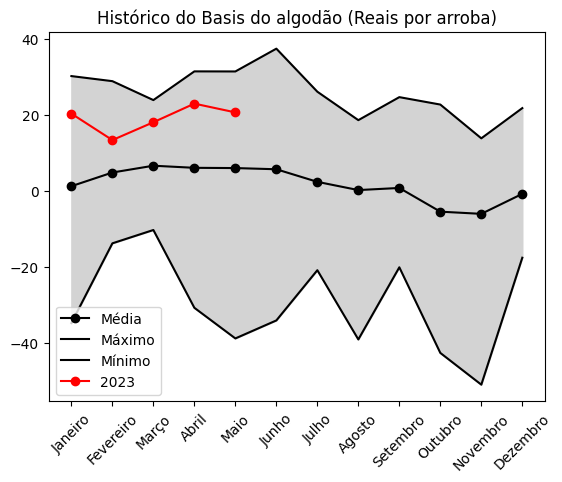

In [ ]:
import matplotlib.pyplot as plt

plt.xticks(rotation=45)
plt.plot(dados_mensais['media'],'-o', label='Média', color='black')
plt.plot(dados_mensais['máximo'], label='Máximo', color='black')
plt.plot(dados_mensais['mínimo'], label='Mínimo', color='black')
plt.plot(dados_mensais['2023'],'-o', label='2023', color='red')
# Preencher a área entre as linhas de máximo e mínimo com a cor cinza claro
plt.fill_between(range(len(dados_mensais)), dados_mensais['mínimo'], dados_mensais['máximo'], color='lightgrey')
plt.legend()
plt.title('Histórico do Basis do algodão (Reais por arroba)')
plt.show()

# Função de plot por ano

In [ ]:
def plotBasisAno(ano, dfAnalisado, dfMerge):
    dadosAno = dfAnalisado.loc[ano]
    dadosAno['mes'] = dadosAno.index.month
    basisAno = pd.DataFrame({'mes': dadosAno['mes'].unique()})
    basisAno.set_index('mes', inplace=True)
    basisAno[ano] = dadosAno.dropna().groupby('mes')['BASIS'].mean()
    nomes_meses = {
    1: 'Janeiro',
    2: 'Fevereiro',
    3: 'Março',
    4: 'Abril',
    5: 'Maio',
    6: 'Junho',
    7: 'Julho',
    8: 'Agosto',
    9: 'Setembro',
    10: 'Outubro',
    11: 'Novembro',
    12: 'Dezembro'
    }
    basisAno.index = basisAno.index.map(nomes_meses)
    dados = pd.merge(dfMerge, basisAno, how='left', left_index=True, right_index=True)
    #agora plotar
    import matplotlib.pyplot as plt

    plt.xticks(rotation=45)
    plt.plot(dados['media'],'-o', label='Média', color='black')
    plt.plot(dados['máximo'], label='Máximo', color='black')
    plt.plot(dados['mínimo'], label='Mínimo', color='black')
    plt.plot(dados[ano],'-o', label=ano, color='red')
    plt.fill_between(range(len(dados)), dados['mínimo'], dados['máximo'], color='lightgrey')
    plt.legend()
    plt.title('Histórico do Basis do algodão (Reais por arroba)')
    plotAno = plt.show()
    return plotAno

<ipython-input-46-af32a4b20c0b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dadosAno['mes'] = dadosAno.index.month


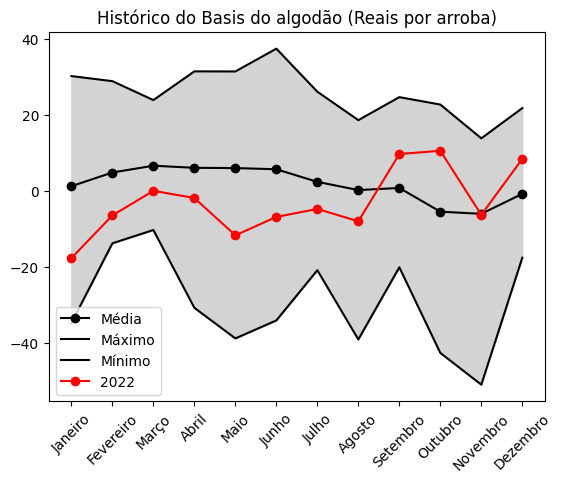

In [ ]:
plotBasisAno('2022', result, dados_mensais)

<ipython-input-46-af32a4b20c0b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dadosAno['mes'] = dadosAno.index.month


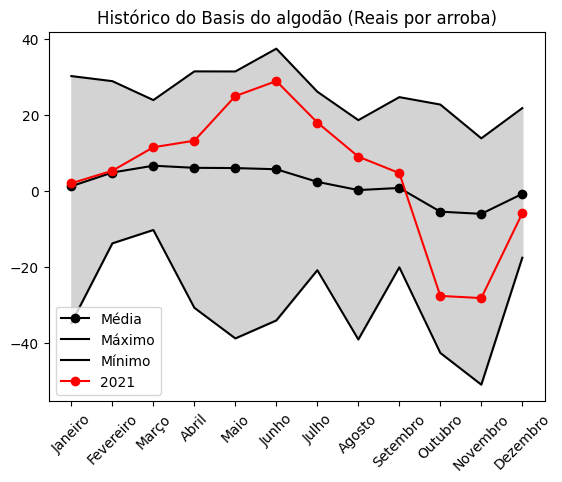

In [ ]:
plotBasisAno('2021', result, dados_mensais)

<ipython-input-46-af32a4b20c0b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dadosAno['mes'] = dadosAno.index.month


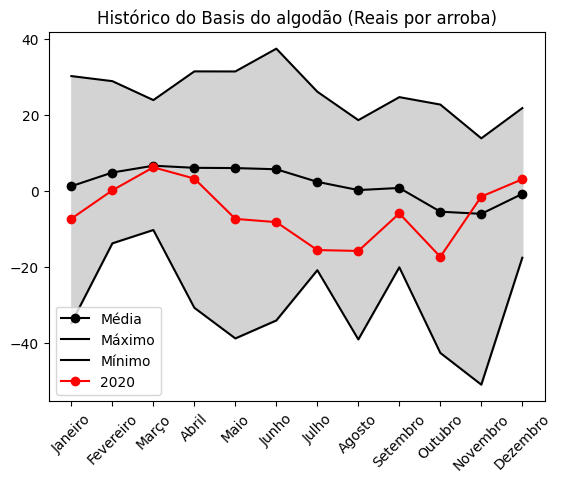

In [ ]:
plotBasisAno('2020', result, dados_mensais)

<ipython-input-46-af32a4b20c0b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dadosAno['mes'] = dadosAno.index.month


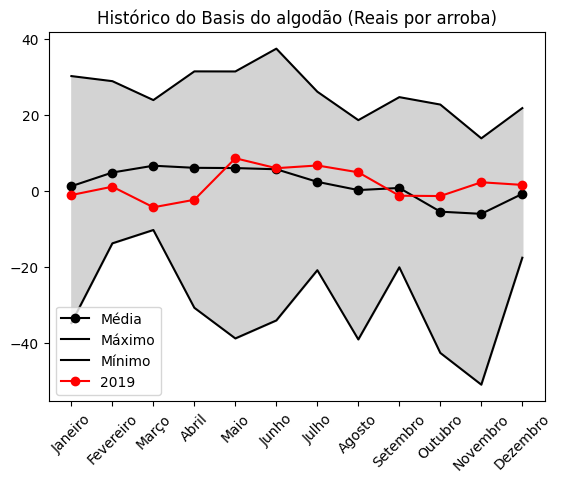

In [ ]:
plotBasisAno('2019', result, dados_mensais)

<ipython-input-46-af32a4b20c0b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dadosAno['mes'] = dadosAno.index.month


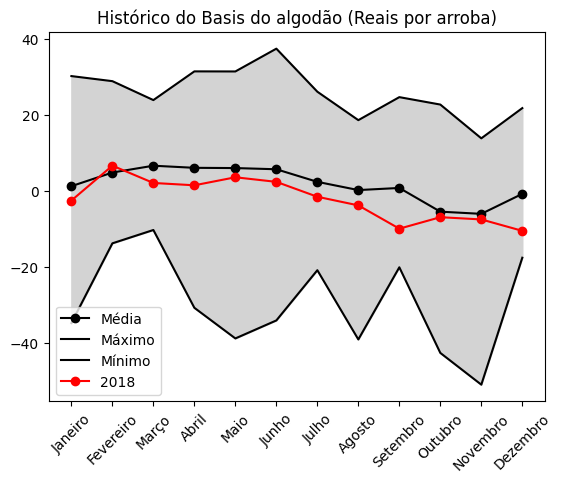

In [ ]:
plotBasisAno('2018', result, dados_mensais)

<ipython-input-46-af32a4b20c0b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dadosAno['mes'] = dadosAno.index.month


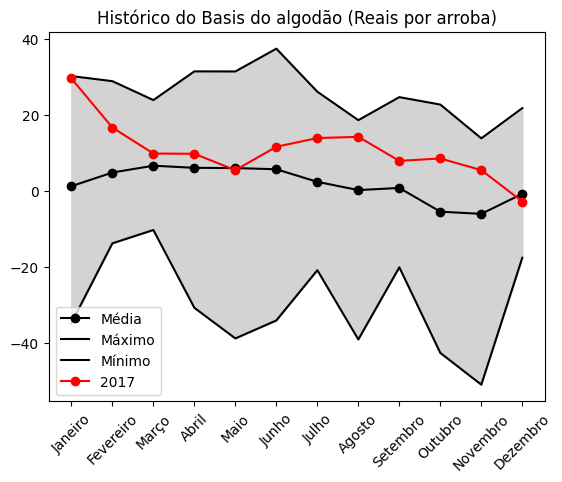

In [ ]:
plotBasisAno('2017', result, dados_mensais)

# Correlações

In [ ]:
def addBasisAno(ano, dfAnalisado, dfMerge):
    dadosAno = dfAnalisado.loc[ano]
    dadosAno['mes'] = dadosAno.index.month
    basisAno = pd.DataFrame({'mes': dadosAno['mes'].unique()})
    basisAno.set_index('mes', inplace=True)
    basisAno[ano] = dadosAno.dropna().groupby('mes')['BASIS'].mean()
    nomes_meses = {
    1: 'Janeiro',
    2: 'Fevereiro',
    3: 'Março',
    4: 'Abril',
    5: 'Maio',
    6: 'Junho',
    7: 'Julho',
    8: 'Agosto',
    9: 'Setembro',
    10: 'Outubro',
    11: 'Novembro',
    12: 'Dezembro'
    }
    basisAno.index = basisAno.index.map(nomes_meses)
    dados = pd.merge(dfMerge, basisAno, how='left', left_index=True, right_index=True)
    return dados

In [ ]:
dados_mensais.drop(['media', 'máximo', 'mínimo'], axis=1, inplace=True)
dados_mensais

,2023
mes,
Janeiro,20.350054
Fevereiro,13.388664
Março,18.085200
Abril,22.983774
Maio,20.675355
Junho,NaN
Julho,NaN
Agosto,NaN
Setembro,NaN


In [ ]:
dados_mensais = addBasisAno('2022', result, dados_mensais)
dados_mensais

<ipython-input-53-d77bccd5c7b2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dadosAno['mes'] = dadosAno.index.month


,2023,2022
mes,,
Janeiro,20.350054,-17.689746
Fevereiro,13.388664,-6.442623
Março,18.085200,0.024484
Abril,22.983774,-1.859216
Maio,20.675355,-11.687045
Junho,NaN,-6.850572
Julho,NaN,-4.732617
Agosto,NaN,-8.009960
Setembro,NaN,9.709116


In [ ]:
dados_mensais = addBasisAno('2021', result, dados_mensais)
dados_mensais = addBasisAno('2020', result, dados_mensais)
dados_mensais = addBasisAno('2019', result, dados_mensais)
dados_mensais = addBasisAno('2018', result, dados_mensais)
dados_mensais = addBasisAno('2017', result, dados_mensais)
dados_mensais

<ipython-input-53-d77bccd5c7b2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dadosAno['mes'] = dadosAno.index.month
<ipython-input-53-d77bccd5c7b2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dadosAno['mes'] = dadosAno.index.month
<ipython-input-53-d77bccd5c7b2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_

,2023,2022,2021,2020,2019,2018,2017
mes,,,,,,,
Janeiro,20.350054,-17.689746,2.023833,-7.298867,-1.074874,-2.532363,29.604049
Fevereiro,13.388664,-6.442623,5.324082,0.166577,1.116887,6.652137,16.680216
Março,18.085200,0.024484,11.500856,6.218526,-4.307034,2.095696,9.853165
Abril,22.983774,-1.859216,13.228769,3.249446,-2.325399,1.483777,9.771210
Maio,20.675355,-11.687045,24.974451,-7.361575,8.604012,3.593255,5.465618
Junho,NaN,-6.850572,28.920646,-8.216218,5.987493,2.388069,11.630622
Julho,NaN,-4.732617,18.013497,-15.566463,6.702451,-1.535214,13.917385
Agosto,NaN,-8.009960,9.020637,-15.799422,4.901171,-3.806175,14.238093
Setembro,NaN,9.709116,4.699550,-5.921947,-1.261387,-9.938062,7.913285


In [ ]:
correlacao = dados_mensais.corr()
correlacao
#Não tem padrão nenhum

,2023,2022,2021,2020,2019,2018,2017
2023,1.000000,-0.105224,0.400001,-0.171902,0.016251,-0.655450,-0.156057
2022,-0.105224,1.000000,-0.402639,0.086848,-0.419247,-0.571415,-0.646754
2021,0.400001,-0.402639,1.000000,0.026139,0.420709,0.640521,0.193351
2020,-0.171902,0.086848,0.026139,1.000000,-0.488329,0.175916,-0.277790
2019,0.016251,-0.419247,0.420709,-0.488329,1.000000,0.192467,-0.111391
2018,-0.655450,-0.571415,0.640521,0.175916,0.192467,1.000000,0.376979
2017,-0.156057,-0.646754,0.193351,-0.277790,-0.111391,0.376979,1.000000


# Correlação das variáveis do basis

## Dólar

In [ ]:
result

,PRECOFIS,Dolar_PTAX,PRECOFUT,BASIS,mes
date,,,,,
2017-01-18,107.0,3.2205,76.956774,30.043226,1
2017-01-19,107.0,3.2107,77.179150,29.820850,1
2017-01-20,107.0,3.1912,77.079765,29.920235,1
2017-01-23,107.0,3.1603,77.995105,29.004895,1
2017-01-24,107.0,3.1643,76.984625,30.015375,1
...,...,...,...,...,...
2023-05-25,157.5,4.9984,132.235051,25.264949,5
2023-05-26,157.5,5.0108,139.191254,18.308746,5
2023-05-29,157.5,4.9948,138.746802,18.753198,5


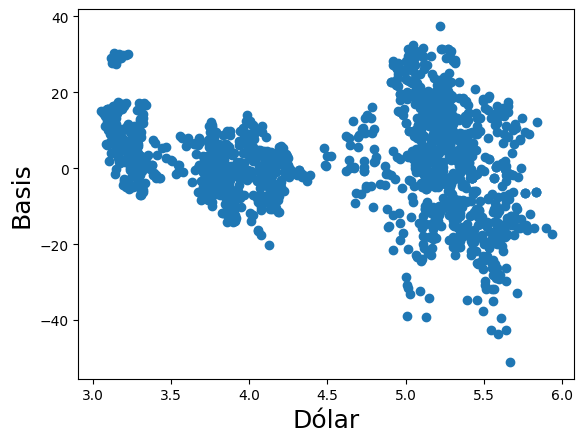

In [ ]:
plt.scatter(result['Dolar_PTAX'], result['BASIS'])
plt.xlabel('Dólar', fontsize=18)
plt.ylabel('Basis', fontsize=18)
plt.show()

In [ ]:
corr_dolar = result['Dolar_PTAX'].corr(result['BASIS'])
corr_dolar
#correlação negativa (esperada), porém baixa

-0.1804989887429738

## Preço físico

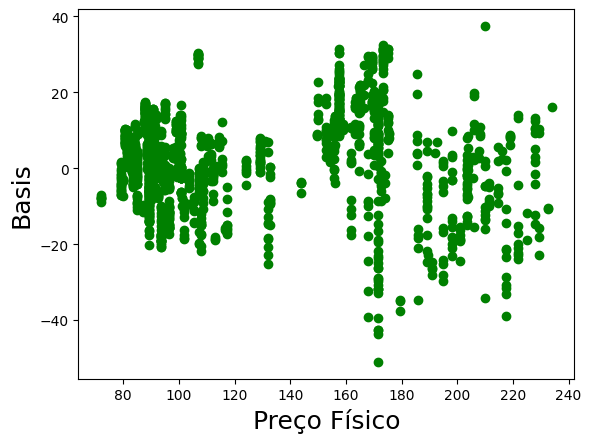

In [ ]:
plt.scatter(result['PRECOFIS'], result['BASIS'], c='green')
plt.xlabel('Preço Físico', fontsize=18)
plt.ylabel('Basis', fontsize=18)
plt.show()

In [ ]:
corr_precofis = result['BASIS'].corr(result['PRECOFIS'])
corr_precofis
#correlação positiva (esperada), porém baixa pela falta de dados e quantidade de dados constantes nos preços da Seagri

0.016183990775754997

## Preço Futuro

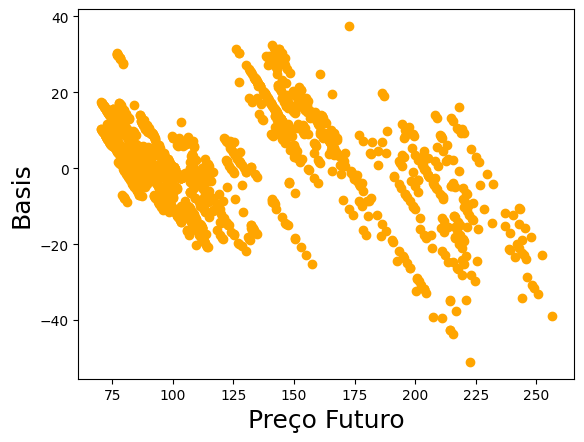

In [ ]:
plt.scatter(result['PRECOFUT'], result['BASIS'], c='orange')
plt.xlabel('Preço Futuro', fontsize=18)
plt.ylabel('Basis', fontsize=18)
plt.show()

In [ ]:
corr_precofut = result['BASIS'].corr(result['PRECOFUT'])
corr_precofut
#correlação negativa (esperada), dados constantes da seagri ainda influenciando muito

-0.26374513466831845

# Curva de preços

In [ ]:
!pip install --upgrade --no-cache-dir git+https://github.com/baselsm/tvdatafeed.git

  Cloning https://github.com/baselsm/tvdatafeed.git to /tmp/pip-req-build-tv9zisq0
  Running command git clone --filter=blob:none --quiet https://github.com/baselsm/tvdatafeed.git /tmp/pip-req-build-tv9zisq0
  Resolved https://github.com/baselsm/tvdatafeed.git to commit cfc26940b273641116effa1b7c12982191b5a941
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 64.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 399.3/399.3 kB 181.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 223.9 MB/s eta 0:00:00
  Created wheel for tvdatafeed: filename=tvdatafeed-1.2.1-py3-none-any.whl size=9303 sha256=9d44931573f178fe24a35c32461c433e804492142c4f3e7dba12b0556236eb13
  Stored in directory: /tmp/pip-ephem-wheel-cache-fb0kfr_z/wheels/91/46/63/9510f70948c24dfc202e934ee9fa0e3d3881b46a9a63905f76
Successfully built tvdatafeed


In [ ]:
from tvDatafeed import TvDatafeed, Interval

In [ ]:
tv = TvDatafeed() #digitar n



do you want to install chromedriver automatically?? y/n	n


In [ ]:
cottonV23 = tv.get_hist(symbol='TTV2023', exchange='NYMEX', interval=Interval.in_daily, n_bars= 5000)
cottonZ23 = tv.get_hist(symbol='TTZ2023', exchange='NYMEX', interval=Interval.in_daily, n_bars= 5000)
cottonH24 = tv.get_hist(symbol='TTH2024', exchange='NYMEX', interval=Interval.in_daily, n_bars= 5000)
cottonK24 = tv.get_hist(symbol='TTK2024', exchange='NYMEX', interval=Interval.in_daily, n_bars= 5000)
cottonN24 = tv.get_hist(symbol='TTN2024', exchange='NYMEX', interval=Interval.in_daily, n_bars= 5000)
cottonV24 = tv.get_hist(symbol='TTV2024', exchange='NYMEX', interval=Interval.in_daily, n_bars= 5000)
cottonZ24 = tv.get_hist(symbol='TTZ2024', exchange='NYMEX', interval=Interval.in_daily, n_bars= 5000)
cottonH25 = tv.get_hist(symbol='TTH2025', exchange='NYMEX', interval=Interval.in_daily, n_bars= 5000)
cottonK25 = tv.get_hist(symbol='TTK2025', exchange='NYMEX', interval=Interval.in_daily, n_bars= 5000)

In [ ]:
dados = [cottonV23.close[-1],
         cottonZ23.close[-1],
         cottonH24.close[-1],
         cottonK24.close[-1],
         cottonN24.close[-1],
         cottonV24.close[-1],
         cottonZ24.close[-1],
         cottonH25.close[-1],
         cottonK25.close[-1]]

dados

[0.8158, 0.8023, 0.8005, 0.8018, 0.803, 0.7889, 0.7769, 0.7792, 0.7767]

In [ ]:
indice = ['V23', 'Z23', 'H24', 'K24', 'N24', 'V24', 'Z24', 'H25', 'K25']
curvaCOTTON = pd.DataFrame(dados, columns=['preco'], index=indice)
curvaCOTTON.index.name = 'contrato'
curvaCOTTON

,preco
contrato,
V23,0.8158
Z23,0.8023
H24,0.8005
K24,0.8018
N24,0.8030
V24,0.7889
Z24,0.7769
H25,0.7792
K25,0.7767


In [ ]:
#está em dólares por libra
curvaCOTTON.preco = curvaCOTTON.preco / convertelibra_arroba(1)
curvaCOTTON

,preco
contrato,
V23,26.977972
Z23,26.531535
H24,26.472011
K24,26.515001
N24,26.554684
V24,26.088406
Z24,25.691574
H25,25.767634
K25,25.684960


In [ ]:
nome_contratos = {
    'V23': 'Outubro 23',
    'Z23':'Dezembro 23',
    'H24':'Março 24',
    'K24':'Maio 24',
    'N24':'Julho 24',
    'V24':'Outubro 24',
    'Z24':'Dezembro 24',
    'H25':'Março 24',
    'K25':'Maio 24'
}
# Substituir os valores do índice
curvaCOTTON.index = curvaCOTTON.index.map(nome_contratos)
curvaCOTTON

,preco
contrato,
Outubro 23,26.977972
Dezembro 23,26.531535
Março 24,26.472011
Maio 24,26.515001
Julho 24,26.554684
Outubro 24,26.088406
Dezembro 24,25.691574
Março 24,25.767634
Maio 24,25.684960


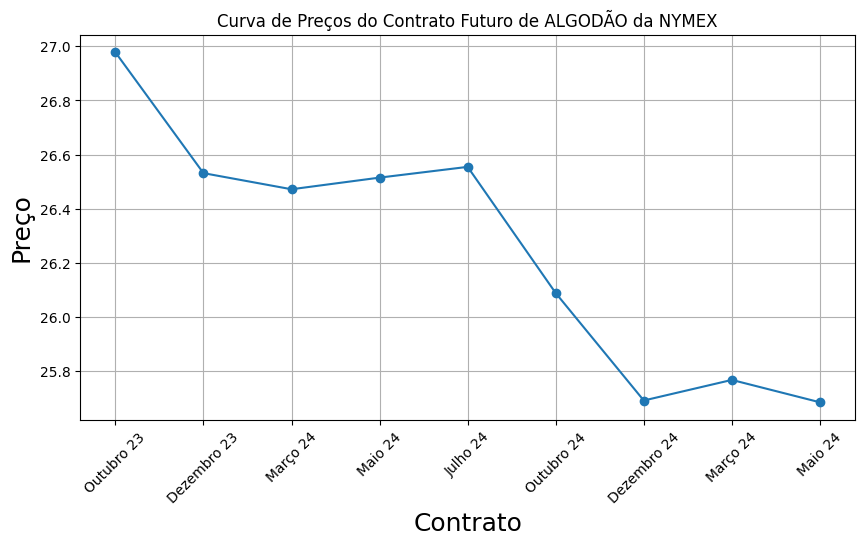

In [ ]:
curvaCOTTON.plot(figsize=(10, 5), style='o-', title='Curva de Preços do Contrato Futuro de ALGODÃO da NYMEX')
plt.xlabel('Contrato', fontsize=18)
plt.ylabel('Preço', fontsize=18)
plt.xticks(rotation=45)
plt.legend().set_visible(False)
plt.grid(True)
plt.show()


# Conclusão

## Base de dados

É notória a influência da base de dados do preço físico do algodão. Os preços físicos foram retirados no site da Seagri, estando constantes em sequência em períodos grandes de tempo.

Isso leva a crer que os dados não estavam sendo atualizados com frequência, e sim que os preços estavam sendo repetidos dia a dia.

Assim, as análises foram feitas levando em conta esse fator.

## Correlação das variáveis do Basis

Basis = físico - futuro

*   O dólar apresentou correlação negativa com o Basis (-0.18), o que era esperado pois o câmbio está ligado ao preço futuro, a correlação apresentou valor baixo, levando a crer que a base de dados afetou o resultado.
*   O preço físico apresenta correlação positiva (0.016), o que se esperava, porém de valor baixo pelo mesmo fator da base de dados da Seagri


*   O preço futuro apresentou correlação negativa, de valor baixo (-0.26).





## Histórico do Basis na comercialização do Algodão

Nota-se que o Basis de algodão tem uma leve tendencia de aumento no primeiro semestre do ano, e uma leve tendência de queda no segundo semestre quando se leva em consideração a média do basis.

É importante destacar que o mês de safra do algodão é agosto, meio do ano, que pode influenciar essas leves tendências no basis, pois o preço físico começa a cair no período pós safra.

Deve-se (de novo) levar em consideração que as informações gráficas podem não ser tão fieis à realidade por conta da base de dados de preço físico.



## Estratégias de negociação

O gráfico de curva de preço mostra que para o algodão, há tanto curvas flat, quanto carry e invertida.

O estudo do comportamento da curva de preços das commodities é imprescindível pois ajuda a compreender a situação econômica dos países, assim como auxilia na tomada de decisões de produtores e compradores, podendo antecipar movimentos de preços, e um melhor gerenciamento de riscos e aproveitamento de oportunidades.

Curva Flat, possui um comportamento no qual os preços futuros estão mais ou menos alinhados, o que significa que há uma pequena diferença de preços entre eles. Importante ressaltar que a curva flat não possui uma característica única de inclinação positiva ou negativa. e neste caso, tanto o produtor quanto o consumidor não veem vantagem em manter estoques, pois a diferença de preço entre o contrato futuro e o preço à vista não cobre os custos econômicos e de armazenagem.

Curva em carry, representa uma curva no qual o comportamento possuem inclinação positiva, ou seja, há um acréscimo de valor ao longo do tempo, associado ao custo econômico do capital e ao custo de carrego, oportunizando o produtor tomar a decisão de  reduzir a oferta no mercado à vista e opta por armazenar o produto, pois a diferença de preço entre o contrato futuro e o preço à vista é suficiente para cobrir os custos econômicos e de armazenagem. O consumidor, por sua vez, opta por fazer estoques, já que a diferença de preço também compensa os custos envolvidos.

Curva invertida possui inclinação negativa, ou seja, há um desconto de valor ao longo do tempo, assim os futuros mais longos possuem valor mais baixo em relação ao spot. a estratégia que se pode adotar é o  produtor decidir aumentar a oferta no mercado à vista e opta por liquidar o produto imediatamente, pois a diferença de preço entre o contrato futuro e o preço à vista não é suficiente para cobrir os custos econômicos e de armazenagem. O consumidor, nesse caso, prefere comprar apenas o necessário, sem formar estoques, pois a diferença de preço futuro em relação ao preço à vista não justifica os custos envolvidos na armazenagem.